In [101]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('ticks')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('dataset.csv', index_col=0)
df_test = pd.read_csv('validation_set.csv', index_col=0)

In [3]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,200000,2,3,1,30,2,2,2,2,2,...,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,...,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0


In [4]:
df_train = df_train.astype(float)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   22500 non-null  float64
 1   SEX                         22500 non-null  float64
 2   EDUCATION                   22500 non-null  float64
 3   MARRIAGE                    22500 non-null  float64
 4   AGE                         22500 non-null  float64
 5   PAY_0                       22500 non-null  float64
 6   PAY_2                       22500 non-null  float64
 7   PAY_3                       22500 non-null  float64
 8   PAY_4                       22500 non-null  float64
 9   PAY_5                       22500 non-null  float64
 10  PAY_6                       22500 non-null  float64
 11  BILL_AMT1                   22500 non-null  float64
 12  BILL_AMT2                   22500 non-null  float64
 13  BILL_AMT3                   225

In [6]:
df_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167267.274667,1.602533,1.852356,1.549911,35.526000,-0.014978,-0.135200,-0.166800,-0.221333,-0.266533,...,43265.662667,40400.279733,38997.275778,5697.756489,5.944526e+03,5308.332489,4802.920444,4724.458178,5165.231067,0.221200
std,129383.700485,0.489385,0.787066,0.521673,9.231461,1.119429,1.189176,1.194886,1.166326,1.131526,...,64360.019334,60879.044012,59646.978910,17201.619690,2.214392e+04,18549.384158,15738.417203,14938.300190,17467.663795,0.415064
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2280.000000,1760.000000,1243.750000,1000.000000,8.270000e+02,390.000000,300.000000,258.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19003.500000,18105.500000,17071.000000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54562.500000,50343.750000,49355.500000,5009.000000,5.000000e+03,4510.500000,4001.500000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [7]:
df_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
print(df_train.SEX.value_counts())
df_train.SEX = np.where(df_train.SEX == 2, 0, df_train.SEX)
print(df_train.SEX.value_counts())

2.0    13557
1.0     8943
Name: SEX, dtype: int64
0.0    13557
1.0     8943
Name: SEX, dtype: int64


In [9]:
conditions = [df_train.MARRIAGE == 3, df_train.MARRIAGE == 2]
choices = [0, 0]

print(df_train.MARRIAGE.value_counts())
df_train.MARRIAGE = np.select(conditions, choices, df_train.MARRIAGE)
print(df_train.MARRIAGE.value_counts())

2.0    11942
1.0    10281
3.0      236
0.0       41
Name: MARRIAGE, dtype: int64
0.0    12219
1.0    10281
Name: MARRIAGE, dtype: int64


In [10]:
conditions = [df_train.EDUCATION == 5, df_train.EDUCATION == 6, df_train.EDUCATION == 0]
choices = [4, 4, 4]

print(df_train.EDUCATION.value_counts())
df_train.EDUCATION = np.select(conditions, choices, df_train.EDUCATION)
print(df_train.EDUCATION.value_counts())

2.0    10546
1.0     7921
3.0     3690
5.0      205
4.0       90
6.0       35
0.0       13
Name: EDUCATION, dtype: int64
2.0    10546
1.0     7921
3.0     3690
4.0      343
Name: EDUCATION, dtype: int64


In [11]:
df_train.rename(columns={'default payment next month': 'default', 'PAY_0': 'PAY_1'}, inplace=True)

In [12]:
col_dict = {col: col.lower() for col in df_train.columns}
df_train.rename(columns=col_dict, inplace = True)
df_train.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [13]:
to_dummy = ['education', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df_train = pd.get_dummies(df_train, columns=to_dummy, prefix=to_dummy, drop_first=True, dtype=float)

In [14]:
df_train.columns = [col.replace('.0', '').replace('-', 'minus_') for col in df_train.columns]
df_train.columns

Index(['limit_bal', 'sex', 'marriage', 'age', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default',
       'education_2', 'education_3', 'education_4', 'pay_1_minus_1', 'pay_1_0',
       'pay_1_1', 'pay_1_2', 'pay_1_3', 'pay_1_4', 'pay_1_5', 'pay_1_6',
       'pay_1_7', 'pay_1_8', 'pay_2_minus_1', 'pay_2_0', 'pay_2_1', 'pay_2_2',
       'pay_2_3', 'pay_2_4', 'pay_2_5', 'pay_2_6', 'pay_2_7', 'pay_3_minus_1',
       'pay_3_0', 'pay_3_1', 'pay_3_2', 'pay_3_3', 'pay_3_4', 'pay_3_5',
       'pay_3_6', 'pay_3_7', 'pay_3_8', 'pay_4_minus_1', 'pay_4_0', 'pay_4_1',
       'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5', 'pay_4_6', 'pay_4_7',
       'pay_4_8', 'pay_5_minus_1', 'pay_5_0', 'pay_5_2', 'pay_5_3', 'pay_5_4',
       'pay_5_5', 'pay_5_6', 'pay_5_7', 'pay_5_8', 'pay_6_minus_1', 'pay_6_0',
       'pay_6_2', 'pay_6_3', 'pay_6_4', 'pay_6_5', 'pay_6_6', 'pay_6_7',
       'pay_

In [15]:
# df_train = pd.concat([df_train.drop(columns=to_dummy, axis=1), dummy_dataframe], axis=1)

# df_train.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172e1fd0>]],
      dtype=object)

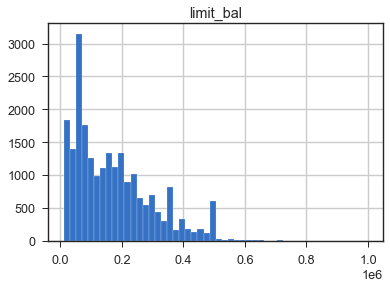

In [16]:
df_train.hist('limit_bal', bins=50)

## VANILLA MODELS

In [17]:
df_van = df_train.copy()

In [18]:
X_van = df_van.drop(columns='default', axis=1)
y_van = df_van['default']

In [19]:
X_train_van, X_test_van, y_train_van, y_test_van = train_test_split(X_van, y_van, random_state=1)

### KNN

In [20]:
params_knn = {
    'n_neighbors': range(1,11,2),
    'weights': ['uniform', 'distance'],
#     'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': range(1,4)
}

In [21]:
CV_knn_van = GridSearchCV(KNeighborsClassifier(), params_knn, n_jobs=-1, scoring='f1', verbose=2)

CV_knn_van.fit(X_train_van, y_train_van)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   48.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11, 2), 'p': range(1, 4),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [22]:
### Identify the best params 
print(CV_knn_van.best_estimator_)

#Identify the best score during fitting with cross-validation
print(CV_knn_van.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')
0.2985771561196075


In [23]:
#predict on the test set
y_pred_knn_van = CV_knn_van.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_knn_van))
print('Test Precision score: ', precision_score(y_test_van, y_pred_knn_van))
print('Test Recall score: ', recall_score(y_test_van, y_pred_knn_van))
print('Test F1 score: ', f1_score(y_test_van, y_pred_knn_van))

Test Accuracy score:  0.6974222222222223
Test Precision score:  0.3096
Test Recall score:  0.31566068515497553
Test F1 score:  0.31260096930533116


In [24]:
results = {}
results['knn_van'] = f1_score(y_test_van, y_pred_knn_van)

### WEIGHTED

In [25]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .001, .01, .1, 1.0, 10.0, 100.0],
    'solver': ['sag', 'saga', 'liblinear'],
}

In [26]:
#create a grid search object and fit it to the data
CV_van_weight = GridSearchCV(LogisticRegression(class_weight='balanced'),
                      param_grid, n_jobs=-1, scoring='f1', verbose=2)

CV_van_weight.fit(X_train_van, y_train_van)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   44.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [27]:
### Identify the best params 
print(CV_van_weight.best_estimator_)

#Identify the best score during fitting with cross-validation
print(CV_van_weight.best_score_)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.5291168246386753


In [28]:
#predict on the test set
y_pred_van_weight = CV_van_weight.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_van_weight))
print('Test Precision score: ', precision_score(y_test_van, y_pred_van_weight))
print('Test Recall score: ', recall_score(y_test_van, y_pred_van_weight))
print('Test F1 score: ', f1_score(y_test_van, y_pred_van_weight))

Test Accuracy score:  0.7715555555555556
Test Precision score:  0.47978067169294036
Test Recall score:  0.5709624796084829
Test F1 score:  0.5214152700186221


In [29]:
results['weight_van'] = f1_score(y_test_van, y_pred_van_weight)

### DECISION TREE

In [30]:
# creating our parameters to test
params_dtc_van = {'max_depth': range(1,16),
                  'max_features': range(1,16),
#                   'min_samples_split': [.9, .8, .7, .6, .5],
#                   'min_samples_leaf': [.00001, .0001, .001, .01, .1],
           }

#create our estimaor
CV_tree_van = DecisionTreeClassifier(random_state=1, class_weight='balanced')

#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree_van = GridSearchCV(CV_tree_van, params_dtc_van, cv=7, scoring='f1', n_jobs=-1, verbose=1)

In [31]:
#fit the Gridsearch to our data
grid_tree_van.fit(X_train_van, y_train_van)

Fitting 7 folds for each of 225 candidates, totalling 1575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1560 out of 1575 | elapsed:   12.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1575 out of 1575 | elapsed:   12.7s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 16),
                         

In [32]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree_van.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree_van.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree_van.best_estimator_)

0.5125347149327443
{'max_depth': 5, 'max_features': 12}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [33]:
#Predict the response for test dataset
y_pred_tree_van = grid_tree_van.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_tree_van))
print('Test Precision score: ', precision_score(y_test_van, y_pred_tree_van))
print('Test Recall score: ', recall_score(y_test_van, y_pred_tree_van))
print('Test F1 score: ', f1_score(y_test_van, y_pred_tree_van))

Test Accuracy score:  0.7937777777777778
Test Precision score:  0.5283993115318416
Test Recall score:  0.5008156606851549
Test F1 score:  0.5142378559463987


In [34]:
results['tree_van'] = f1_score(y_test_van, y_pred_tree_van)

### RANDOM FOREST

In [35]:
#create a dictionary of all the parameters you want to tune
params_forest = { 
    'max_depth': range(3,14),
    'max_features': range(3,11),
#     'min_samples_split': (.9,.8,.7,.6,.5),
#     'min_samples_leaf': (.001,.01,.1),
#     'n_estimators': (100, 250, 500)
}

In [36]:
#create a grid search object and fit it to the data
forest_van = RandomForestClassifier(random_state = 1, n_estimators=250)
CV_forest_van = GridSearchCV(forest_van, params_forest, scoring='f1', n_jobs=-1, verbose=2)
CV_forest_van.fit(X_train_van, y_train_van)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  4.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [37]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(CV_forest_van.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(CV_forest_van.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(CV_forest_van.best_estimator_)

0.45784379672247705
{'max_depth': 13, 'max_features': 10}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [38]:
#Predict the response for test dataset
y_pred_forest_van = CV_forest_van.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_forest_van))
print('Test Precision score: ', precision_score(y_test_van, y_pred_forest_van))
print('Test Recall score: ', recall_score(y_test_van, y_pred_forest_van))
print('Test F1 score: ', f1_score(y_test_van, y_pred_forest_van))

Test Accuracy score:  0.8181333333333334
Test Precision score:  0.6650406504065041
Test Recall score:  0.333605220228385
Test F1 score:  0.44432373709940254


In [39]:
results['forest_van'] = f1_score(y_test_van, y_pred_forest_van)

In [40]:
results

{'knn_van': 0.31260096930533116,
 'weight_van': 0.5214152700186221,
 'tree_van': 0.5142378559463987,
 'forest_van': 0.44432373709940254}

## FEATURE CREATION/SELECTION

In [41]:
# import seaborn as sns
# sns.set(style="ticks")

# sns.pairplot(df_train, hue="default")

In [42]:
df_train['default'].corr(df_train['limit_bal'])

-0.15085541691276222

In [43]:
# df_train['sum_paycodes'] = df_train['pay_1'] + df_train['pay_2'] + df_train['pay_3'] + df_train['pay_4'] + df_train['pay_5'] + df_train['pay_6']
# df_train['limit_paycodes'] = df_train['limit_bal'] * df_train['sum_paycodes'].apply(lambda x: x-.01)

In [44]:
# df_train['limit_paycodes'].describe()

In [45]:
# df_train.hist('limit_paycodes', bins=100)

In [46]:
# df_train['default'].corr(df_train['limit_paycodes'])

In [47]:
df_train['avg_bill'] = (df_train['bill_amt1'] + df_train['bill_amt2'] + df_train['bill_amt3'] + df_train['bill_amt4'] + df_train['bill_amt5'] + df_train['bill_amt6']).apply(lambda x: x/6)
df_train['avg_pay'] = (df_train['pay_amt1'] + df_train['pay_amt2'] + df_train['pay_amt3'] + df_train['pay_amt4'] + df_train['pay_amt5'] + df_train['pay_amt6']).apply(lambda x: x/6)


In [48]:
df_train['avg_bill'].describe()

count     22500.000000
mean      44944.329207
std       63117.927375
min      -20913.333333
25%        4726.000000
50%       21102.416667
75%       57202.125000
max      877313.833333
Name: avg_bill, dtype: float64

In [49]:
df_train['avg_pay'].describe()

count     22500.000000
mean       5273.870800
std       10244.258824
min           0.000000
25%        1104.125000
50%        2385.166667
75%        5542.208333
max      627344.333333
Name: avg_pay, dtype: float64

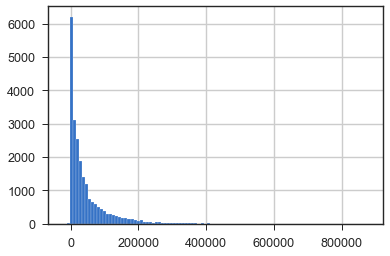

In [50]:
df_train['avg_bill'].hist(bins=100)

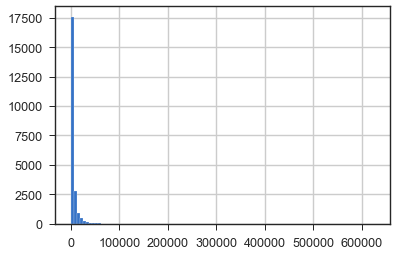

In [51]:
df_train['avg_pay'].hist(bins=100)

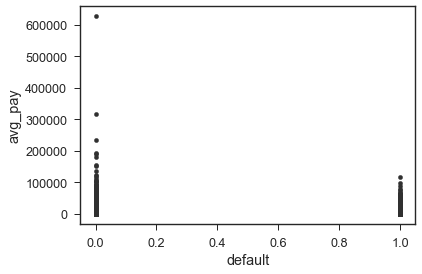

In [52]:
df_train.plot.scatter('default', 'avg_pay')

In [53]:
# to_bin = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# for col in to_bin:
#     conditions = [df_train[col] <= 0, df_train[col] > 0]
#     choices = [0, 1]
#     df_train[col + '_bin'] = np.select(conditions, choices, df_train[col])

In [54]:
# bin_cols = ['pay_1_bin', 'pay_2_bin', 'pay_3_bin', 'pay_4_bin', 'pay_5_bin', 'pay_6_bin']

# for col in bin_cols:
#     print('-------------------------------')
#     print(df_train.groupby('default')[col].value_counts(normalize=True))
#     print('-------------------------------')

In [55]:
# print('Paycode 1 Summary')

# print('\n')
# print(df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack())

# # Passenger class visualization
# pay1_bin = df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack()
# p1 = pay1_bin.plot(kind = 'bar', stacked = True, 
#                    title = 'Paycodes Binned: Defaulters vs Non-Defaulters', 
#                    color = ['grey','lightgreen'], alpha = .70)
# p1.set_xlabel('Paycode 1')
# p1.set_ylabel('# Users')
# p1.legend(['Did Not Default','Defaulted'])
# plt.show()

In [56]:
# print('Paycode 2 Summary')

# print('\n')
# print(df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack())

# pay2 = df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack()
# p2 = pay2.plot(kind = 'bar', stacked = True, 
#                    title = 'Paycode 2: Survivors vs Non-Survivors', 
#                    color = ['grey','lightgreen'], alpha = .70)
# p2.set_xlabel('Paycode 2')
# p2.set_ylabel('# Users')
# p2.legend(['Did Not Default','Defaulted'])
# plt.show()

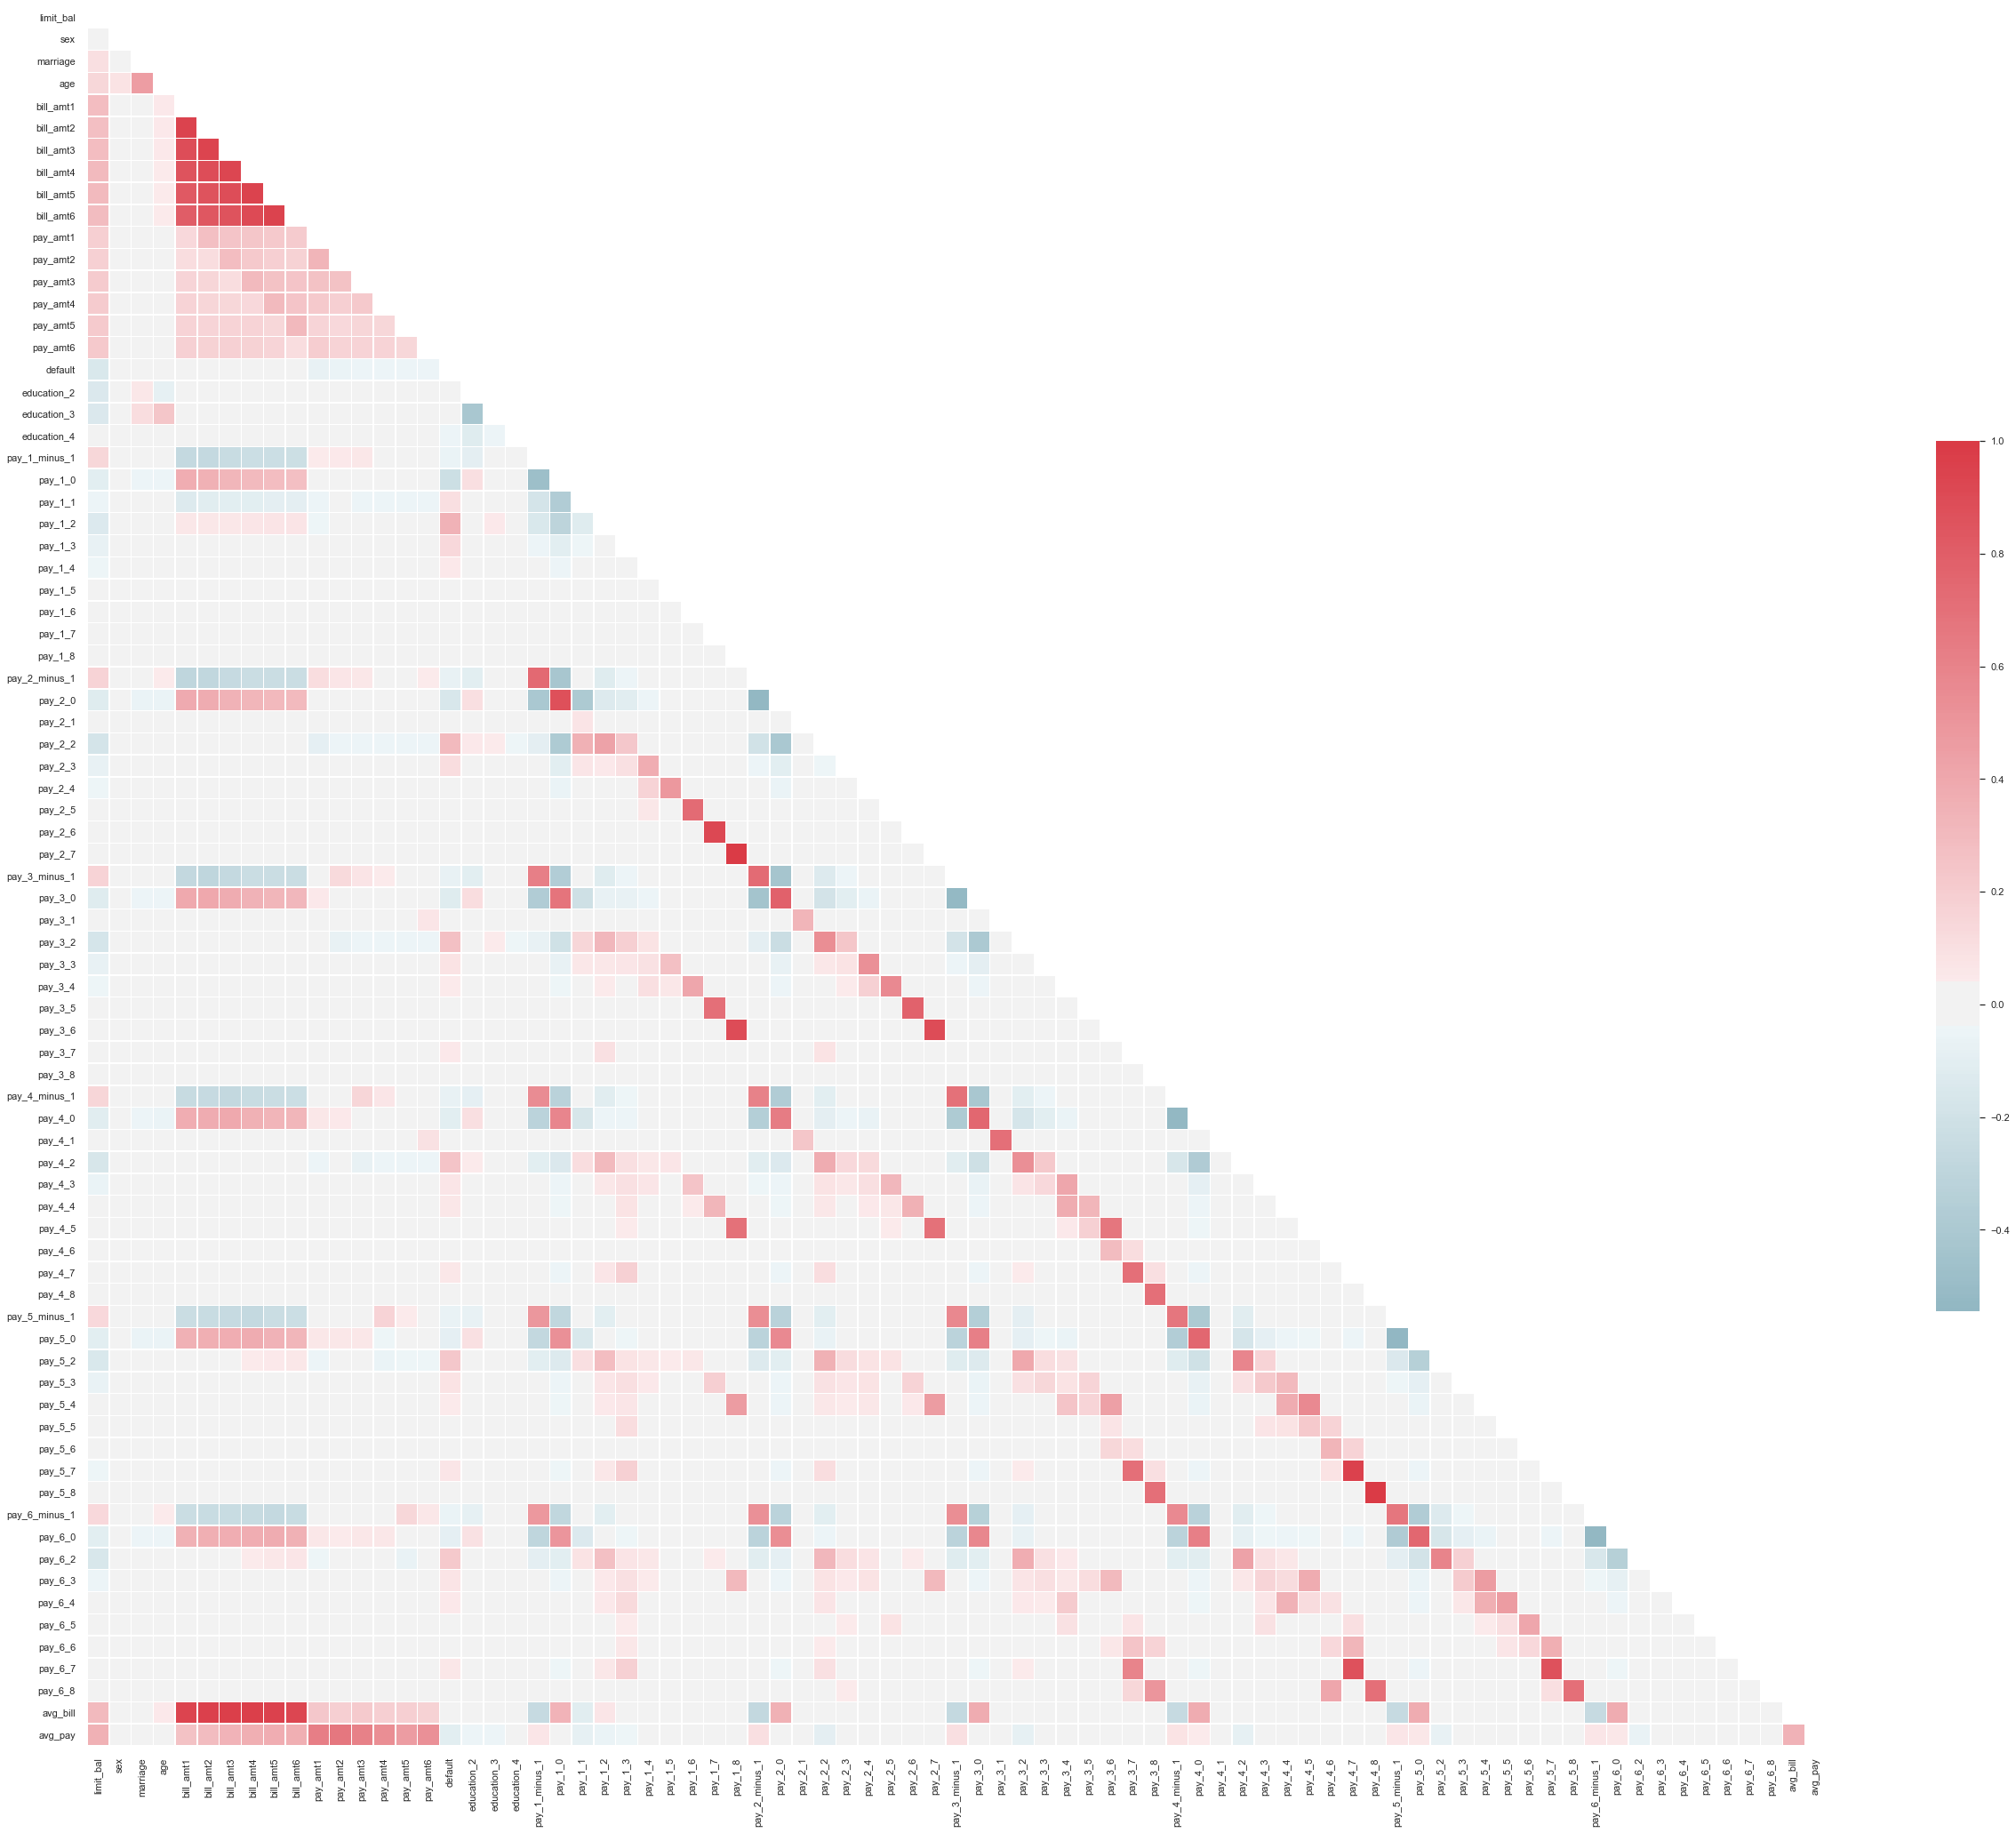

In [57]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
df_train['avg_bill'].corr(df_train['bill_amt2'])

0.9611448174765377

In [59]:
df_train['bill_pct'] = df_train['avg_bill'] / df_train['limit_bal']
df_train['bill_pct'].describe()

count    22500.000000
mean         0.372672
std          0.351987
min         -0.232590
25%          0.029979
50%          0.285153
75%          0.686613
max          5.364308
Name: bill_pct, dtype: float64

In [60]:
to_drop = ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

df_train.drop(columns=to_drop, inplace=True)

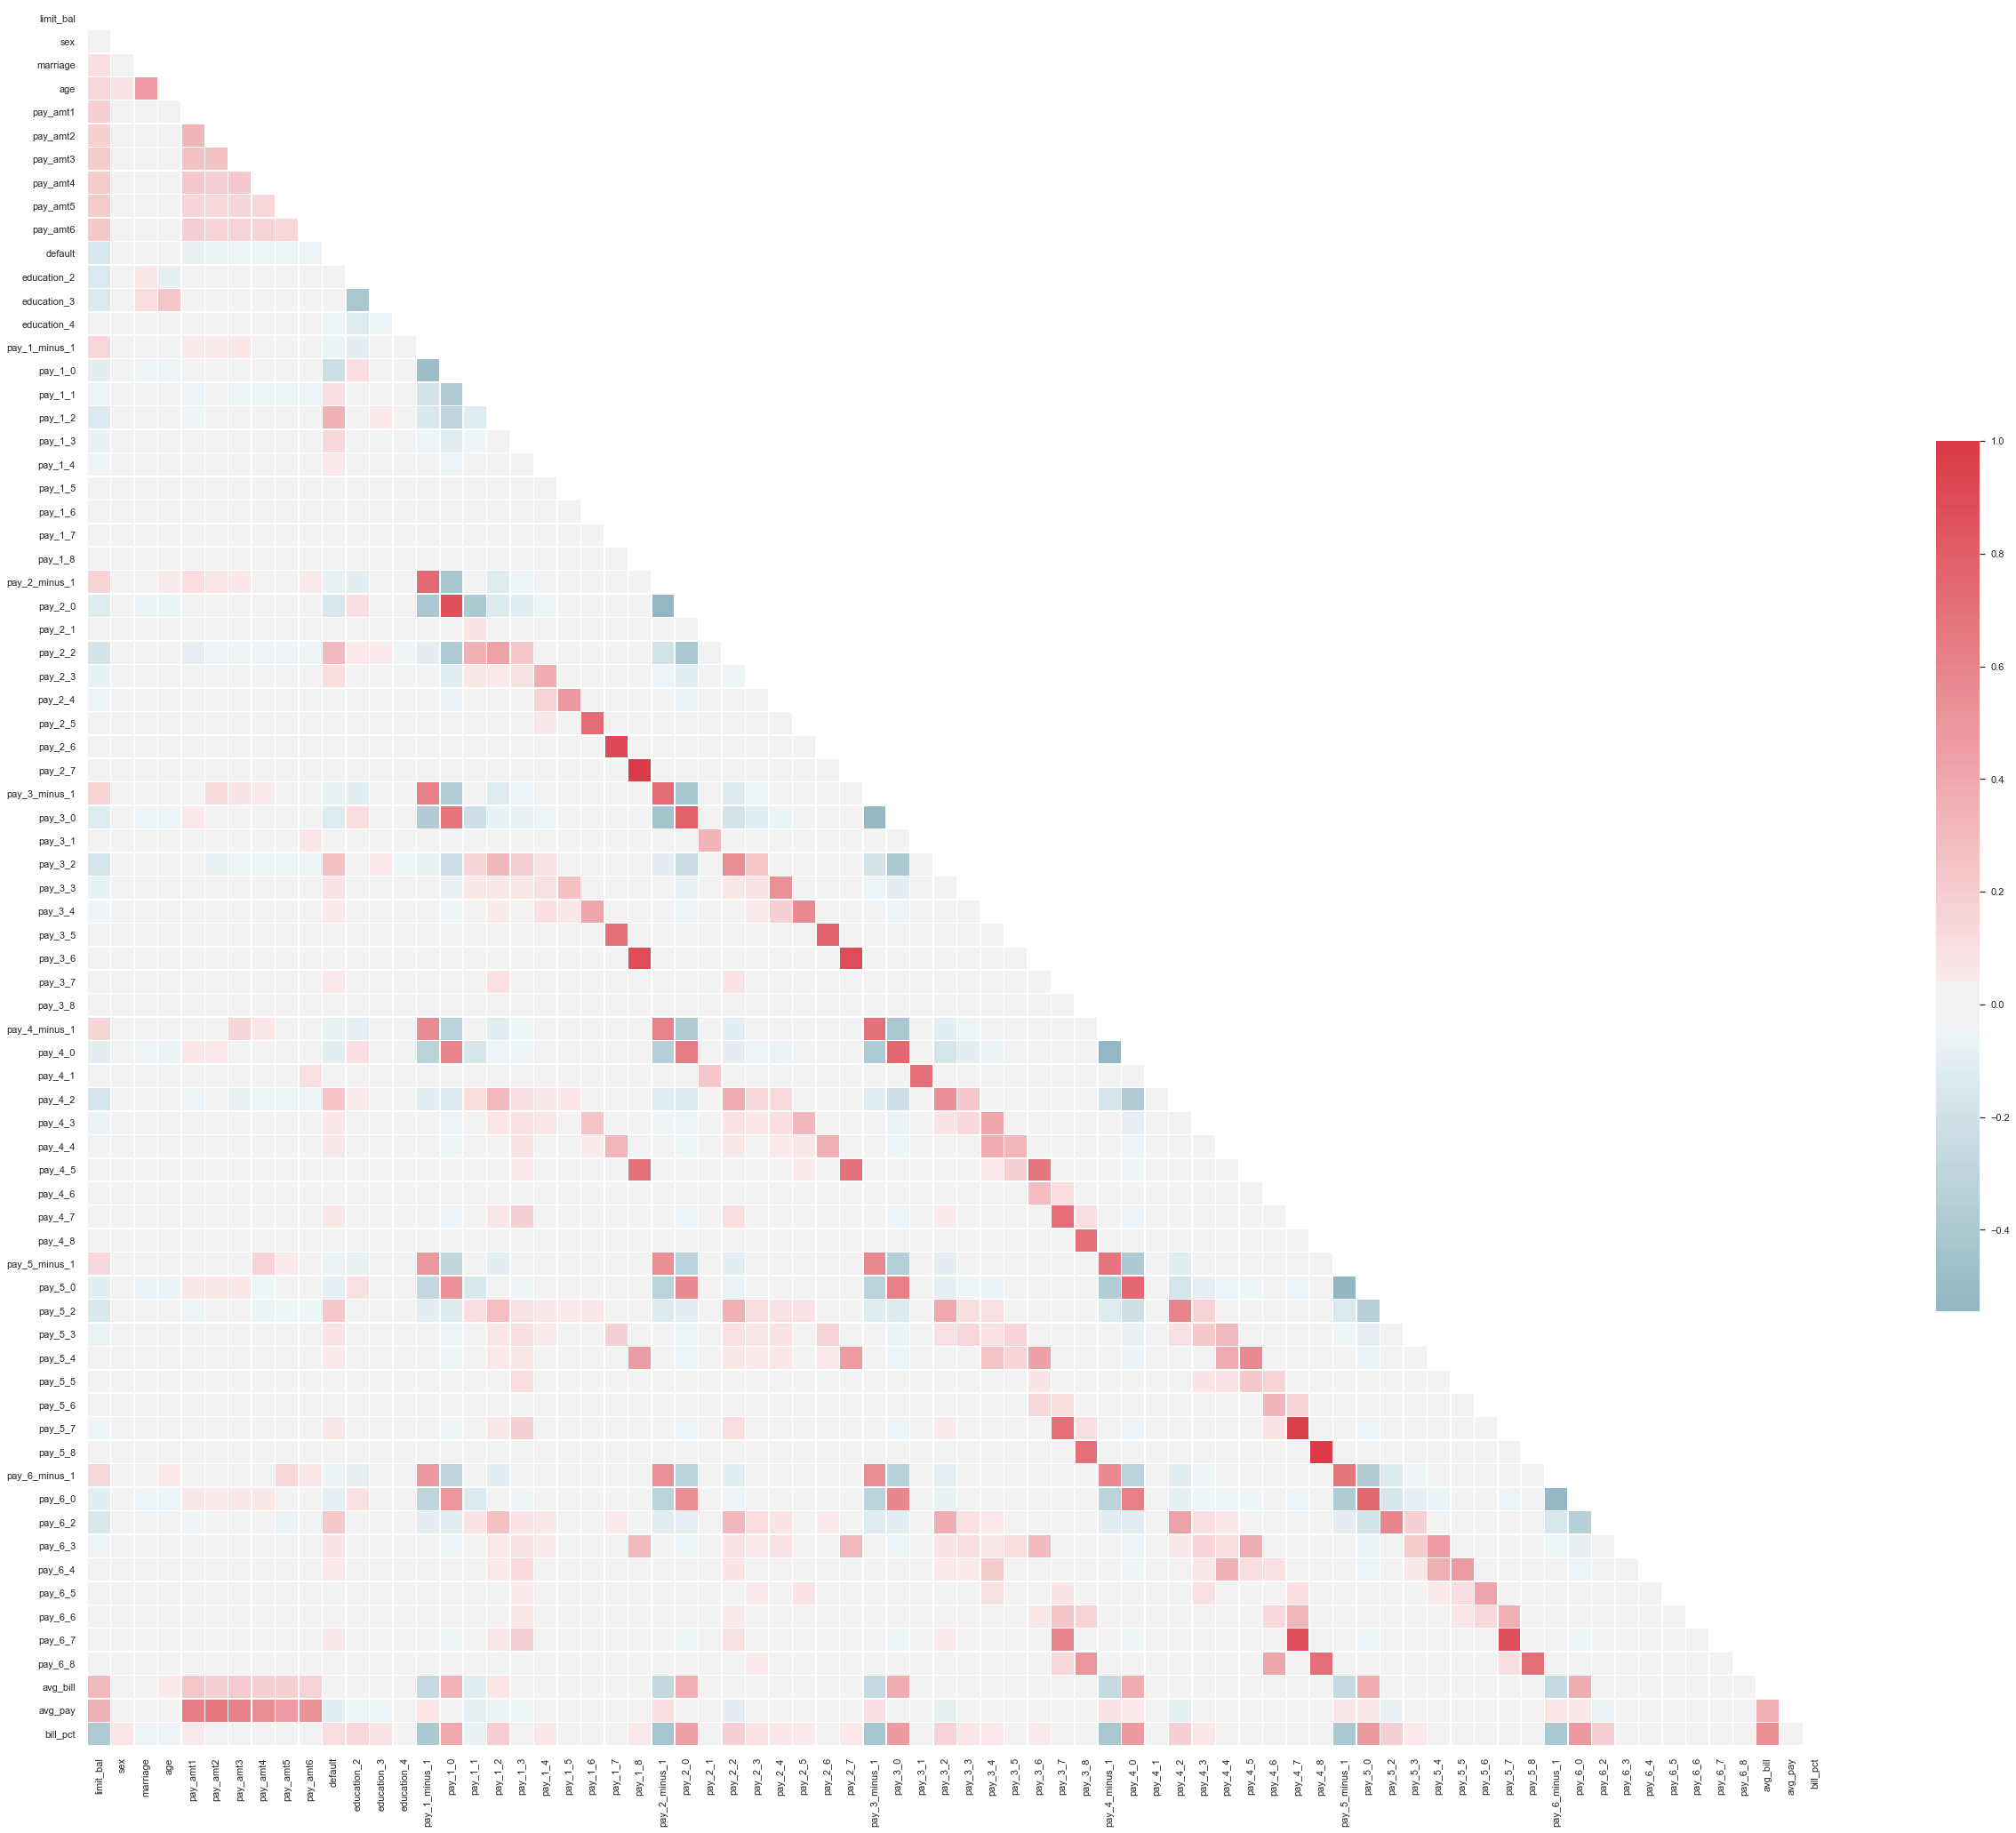

In [61]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
corr_matrix = df_train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

sol[sol > .8]

pay_1_8  pay_2_7    1.000000
pay_4_8  pay_5_8    1.000000
pay_4_7  pay_5_7    0.955466
pay_1_7  pay_2_6    0.912851
pay_2_7  pay_3_6    0.901328
pay_1_8  pay_3_6    0.901328
pay_1_0  pay_2_0    0.874829
pay_4_7  pay_6_7    0.869014
pay_5_7  pay_6_7    0.869014
dtype: float64

In [63]:
corr_drop = ['pay_1_8', 'pay_4_8', 'pay_5_7', 'pay_2_7', 'pay_1_7', 'pay_2_0', 'pay_6_7']
df_train.drop(columns=corr_drop, inplace=True)

In [64]:
y = df_train['default']
X = df_train.drop(columns=['default'], axis=1)
X.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,...,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_8,avg_bill,avg_pay,bill_pct
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,6000.0,5000.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,146221.333333,4910.000000,0.731107
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6.0,6530.0,8103.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6543.833333,3849.333333,0.327192
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,700.0,718.0,700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39625.000000,16499.666667,0.792500
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.000000,130.000000,0.009750


In [261]:
X.columns

Index(['limit_bal', 'sex', 'marriage', 'age', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'education_2',
       'education_3', 'education_4', 'pay_1_minus_1', 'pay_1_0', 'pay_1_1',
       'pay_1_2', 'pay_1_3', 'pay_1_4', 'pay_1_5', 'pay_1_6', 'pay_2_minus_1',
       'pay_2_1', 'pay_2_2', 'pay_2_3', 'pay_2_4', 'pay_2_5', 'pay_2_6',
       'pay_3_minus_1', 'pay_3_0', 'pay_3_1', 'pay_3_2', 'pay_3_3', 'pay_3_4',
       'pay_3_5', 'pay_3_6', 'pay_3_7', 'pay_3_8', 'pay_4_minus_1', 'pay_4_0',
       'pay_4_1', 'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5', 'pay_4_6',
       'pay_4_7', 'pay_5_minus_1', 'pay_5_0', 'pay_5_2', 'pay_5_3', 'pay_5_4',
       'pay_5_5', 'pay_5_6', 'pay_5_8', 'pay_6_minus_1', 'pay_6_0', 'pay_6_2',
       'pay_6_3', 'pay_6_4', 'pay_6_5', 'pay_6_6', 'pay_6_8', 'avg_bill',
       'avg_pay', 'bill_pct'],
      dtype='object')

In [65]:
def find_extremes(df):
    '''Takes in a dataframe and returns a list of columns with values farther than 4 standard deviations from the mean.'''
    extreme_list = []
    for column in list(df.columns):
        if (df[column].max() > (df[column].mean() + 4*df[column].std())) or (df[column].min() < (df[column].mean() - 4*df[column].std())):
            extreme_list.append(column)
    return extreme_list

def rein_extremes(df, columns):
    '''Takes in a dataframe and a list of columns and changes any values farther than 4 standard deviations from the mean
    to 4 standard deviations from the mean.
    Overwrites the input column!'''
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        conditions = [df[column] > mean + 4*std,
                      df[column] < mean - 4*std]
        choices = [mean + 4*std,
                   mean - 4*std]
        df[column] = np.select(conditions, choices, df[column])

In [66]:
extreme_cols = find_extremes(X)
extremes = extreme_cols[:8]
extremes.extend(extreme_cols[-3:])
extremes

['limit_bal',
 'age',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'avg_bill',
 'avg_pay',
 'bill_pct']

In [67]:
# Remove target variable, so we don't replace any values.

X[extremes].describe()

,limit_bal,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,avg_bill,avg_pay,bill_pct
count,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167267.274667,35.526000,5697.756489,5.944526e+03,5308.332489,4802.920444,4724.458178,5165.231067,44944.329207,5273.870800,0.372672
std,129383.700485,9.231461,17201.619690,2.214392e+04,18549.384158,15738.417203,14938.300190,17467.663795,63117.927375,10244.258824,0.351987
min,10000.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-20913.333333,0.000000,-0.232590
25%,50000.000000,28.000000,1000.000000,8.270000e+02,390.000000,300.000000,258.000000,118.000000,4726.000000,1104.125000,0.029979
50%,140000.000000,34.000000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,21102.416667,2385.166667,0.285153
75%,240000.000000,41.000000,5009.000000,5.000000e+03,4510.500000,4001.500000,4000.000000,4000.000000,57202.125000,5542.208333,0.686613
max,1000000.000000,79.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,527143.000000,877313.833333,627344.333333,5.364308


In [68]:

rein_extremes(X, extremes)
X[extremes].describe()

,limit_bal,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,avg_bill,avg_pay,bill_pct
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167219.347347,35.525296,5091.971806,5261.128031,4653.850035,4225.705861,4143.559305,4431.180831,44141.196472,5040.408665,0.372189
std,129165.157323,9.228492,9912.110569,11516.629068,10262.975499,9247.161895,8835.252275,10384.344098,58864.410765,7536.284042,0.348800
min,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20913.333333,0.000000,-0.232590
25%,50000.000000,28.000000,1000.000000,827.000000,390.000000,300.000000,258.000000,118.000000,4726.000000,1104.125000,0.029979
50%,140000.000000,34.000000,2100.000000,2006.000000,1800.000000,1500.000000,1500.000000,1500.000000,21102.416667,2385.166667,0.285153
75%,240000.000000,41.000000,5009.000000,5000.000000,4510.500000,4001.500000,4000.000000,4000.000000,57202.125000,5542.208333,0.686613
max,684802.076605,72.451843,74504.235248,94520.207550,79505.869122,67756.589258,64477.658936,75035.886248,297416.038707,46250.906095,1.780622


In [69]:
X_sm = sm.add_constant(X)
est = sm.OLS(y, X_sm)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     89.68
Date:                Thu, 21 May 2020   Prob (F-statistic):               0.00
Time:                        11:54:56   Log-Likelihood:                -9506.6
No. Observations:               22500   AIC:                         1.915e+04
Df Residuals:                   22433   BIC:                         1.968e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1565      0.015     10.473

In [70]:
p = est2.pvalues
high_p = p[p > .1].keys()

X_simp = X.drop(columns=high_p)

X_simp.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt5,pay_amt6,education_4,...,pay_5_2,pay_5_4,pay_6_minus_1,pay_6_0,pay_6_3,pay_6_6,pay_6_8,avg_bill,avg_pay,bill_pct
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,5000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,146221.333333,4910.000000,0.731107
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6530.0,8103.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6543.833333,3849.333333,0.327192
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,718.0,700.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39625.000000,16499.666667,0.792500
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.000000,130.000000,0.009750


In [71]:
X_sm2 = sm.add_constant(X_simp)
est = sm.OLS(y, X_sm2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     154.6
Date:                Thu, 21 May 2020   Prob (F-statistic):               0.00
Time:                        11:54:56   Log-Likelihood:                -9527.0
No. Observations:               22500   AIC:                         1.913e+04
Df Residuals:                   22461   BIC:                         1.944e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1656      0.015     11.421

## INTERACTIONS

In [72]:
# from sklearn.preprocessing import PolynomialFeatures

# polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = polynomial_features_2.fit_transform(X)
# poly_columns = polynomial_features_2.get_feature_names(X.columns)

# X_poly = pd.DataFrame(X_poly, columns=poly_columns)
# X_poly.head()

In [73]:
# X_poly_cols = [col.replace(' ', '_') for col in X_poly.columns]
# X_poly.columns = X_poly_cols

In [74]:
# # Create correlation matrix
# corr_matrix = X_poly.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper

In [75]:
# # Find index of feature columns with correlation greater than 0.90
# to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
# X_poly.drop(columns=to_drop, inplace=True)
# X_poly.shape


In [76]:
# X_poly.head()

In [77]:
# sns.set(style="white")

# # Compute the correlation matrix
# corr = X_poly.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(44, 36))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [78]:



# X_poly_2 = sm.add_constant(X_poly)
# est = sm.OLS(y, X_poly_2)
# est2 = est.fit()
# print(est2.summary())

In [79]:
# result.summary()

In [80]:
# p = est2.pvalues
# high_p = p[p > .2].keys()

# X_poly_simplified = X_poly.drop(columns=high_p)
# X_poly_simplified.drop(columns=['education_2_education_3', 'education_2_education_4', 'education_3_education_4'],
#                       inplace=True)
# X_poly_simplified.head()

In [81]:
# X_poly_2 = sm.add_constant(X_poly_simplified)
# est = sm.OLS(y, X_poly_2)
# est2 = est.fit()
# print(est2.summary())

In [82]:
# p = est2.pvalues
# high_p = p[p > .2].keys()

# X_poly_simplified = X_poly_simplified.drop(columns=high_p)
# # X_poly_simplified.drop(columns=poly_drop,
# #                       inplace=True)
# X_poly_simplified.head()

In [83]:
# X_poly_2 = sm.add_constant(X_poly_simplified)
# est = sm.OLS(y, X_poly_2)
# est2 = est.fit()
# print(est2.summary())

In [84]:
# sns.set(style="white")

# # Compute the correlation matrix
# corr = X_poly_simplified.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(44, 36))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

## TRAIN-TEST SPLIT

In [85]:
X_simp.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt5,pay_amt6,education_4,...,pay_5_2,pay_5_4,pay_6_minus_1,pay_6_0,pay_6_3,pay_6_6,pay_6_8,avg_bill,avg_pay,bill_pct
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,5000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,146221.333333,4910.000000,0.731107
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6530.0,8103.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6543.833333,3849.333333,0.327192
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,718.0,700.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39625.000000,16499.666667,0.792500
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.000000,130.000000,0.009750


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Baseline

In [266]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [267]:
y_pred = logreg.predict(X_test)

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.459620596205962
0.8227555555555556
0.6849757673667205
0.3458401305057096


In [89]:
results['baseline'] = (f1_score(y_test, y_pred))

In [90]:
lr_coef_df = pd.DataFrame(data=logreg.coef_)
lr_coef_df.columns = X.columns
lr_coef_df = lr_coef_df.T.sort_values(by=0).T
lr_coef_df.T

,0
pay_amt2,-0.245857
pay_amt1,-0.228242
limit_bal,-0.176005
pay_6_0,-0.167211
pay_amt3,-0.160401
...,...
pay_1_3,0.210832
pay_1_minus_1,0.216816
pay_1_1,0.256816
avg_pay,0.341984


In [91]:
sorted_df = lr_coef_df.T
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].tail(10)

,0
pay_6_4,0.018685
pay_2_1,0.010362
pay_5_0,-0.009421
pay_2_5,0.009036
pay_6_5,0.005592
pay_4_3,-0.005260
pay_5_3,0.004104
education_3,-0.003615
pay_3_7,0.000830
pay_3_4,0.000764


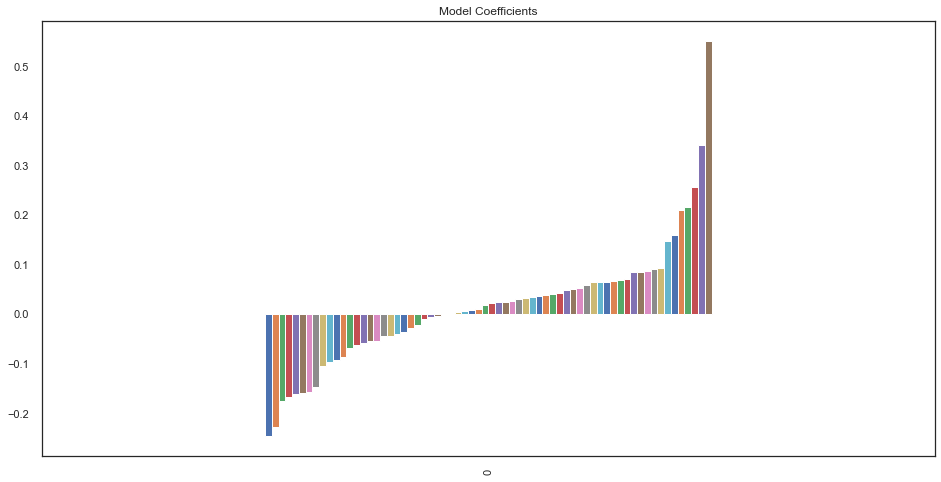

In [92]:
lr_coefs = sum(sorted_df[0].abs())
lr_coef_df.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8))

## GRIDSEARCH SETUP

In [93]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .0005, .001, .01, .1, 1.0, 10.0],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}

### Class imbalance treatment

### SMOTE

In [94]:
smoten = SMOTE(sampling_strategy='minority', random_state=23)
X_train_smote, y_train_smote = smoten.fit_sample(X_train, y_train)

In [95]:
CV_smote = GridSearchCV(LogisticRegression(),
                      param_grid, n_jobs=-1, scoring='f1', verbose=1)
CV_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 405 out of 420 | elapsed:   43.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   46.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.01, 0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [96]:
### Identify the best params 
print(CV_smote.best_estimator_)

#Identify the best score during fitting with cross-validation
print(CV_smote.best_score_)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.6696505835975433


In [97]:
y_pred_smote = CV_smote.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_smote))
print('Test Precision score: ', precision_score(y_test, y_pred_smote))
print('Test Recall score: ', recall_score(y_test, y_pred_smote))
print('Test F1 score: ', f1_score(y_test, y_pred_smote))

Test Accuracy score:  0.7493333333333333
Test Precision score:  0.4446450060168472
Test Recall score:  0.6027732463295269
Test F1 score:  0.5117728531855956


In [98]:
results['smote'] = f1_score(y_test, y_pred_smote)

In [99]:
# print(confusion_matrix(y_test, y_pred_smote))

In [ ]:
breakfast

### Weighted

In [410]:
params_weight = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.00009, .000095, .0001, .00015, .00025,],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}

In [414]:
#create a grid search object and fit it to the data

CV_weighted = GridSearchCV(LogisticRegression(class_weight='balanced'),
                      param_grid, n_jobs=-1, scoring='f1', verbose=2)
CV_weighted.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   37.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.0005, 0.001, 0.01, 0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [415]:

### Identify the best params 
print(CV_weighted.best_estimator_)


#Identify the best score during fitting with cross-validation
print(CV_weighted.best_score_)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.5296990122777367


In [416]:
#predict on the test set

y_pred_weighted = CV_weighted.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_weighted))
print('Test Precision score: ', precision_score(y_test, y_pred_weighted))
print('Test Recall score: ', recall_score(y_test, y_pred_weighted))
print('Test F1 score: ', f1_score(y_test, y_pred_weighted))

Test Accuracy score:  0.7687111111111111
Test Precision score:  0.47491638795986624
Test Recall score:  0.5791190864600326
Test F1 score:  0.5218669606762221


In [213]:
results['weighted'] = f1_score(y_test, y_pred_weighted)

### Weighted simplified

In [ ]:
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=1)

# scaler = StandardScaler()  
# scaler.fit(X_train2)

# X_train2 = scaler.transform(X_train2)  
# X_test2 = scaler.transform(X_test2)

In [ ]:
# #create a grid search object and fit it to the data

# CV_weighted2 = GridSearchCV(LogisticRegression(class_weight='balanced'),
#                       param_grid, n_jobs=-1, scoring='f1', verbose=2)
# CV_weighted2.fit(X_train2, y_train2)

In [ ]:
# ### Identify the best params 
# print(CV_weighted2.best_estimator_)


# #Identify the best score during fitting with cross-validation
# print(CV_weighted2.best_score_)

In [ ]:
# #predict on the test set

# y_pred_weighted2 = CV_weighted2.best_estimator_.predict(X_test2)

# # checking metrics
# print('Test Accuracy score: ', metrics.accuracy_score(y_test2, y_pred_weighted2))
# print('Test Precision score: ', metrics.precision_score(y_test2, y_pred_weighted2))
# print('Test Recall score: ', metrics.recall_score(y_test2, y_pred_weighted2))
# print('Test F1 score: ', metrics.f1_score(y_test2, y_pred_weighted2))

In [ ]:
# results['weighted_simp'] = f1_score(y_test2, y_pred_weighted2)

### DECISION TREE

In [132]:
# creating our parameters to test
params_dtc = {'max_depth': range(1,11),
                  'max_features': range(5,21),
#                   'min_samples_split': [.9, .8, .7, .6, .5],
#                   'min_samples_leaf': [.000001, .00001, .0001, .001],
           }

#create our estimaor
d_tree = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV using the F1 metric for our scoring. 
CV_tree = GridSearchCV(d_tree, params_dtc, scoring='f1', n_jobs=-1, verbose=1)

In [133]:
#fit the Gridsearch to our data
CV_tree.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    6.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(5, 21)},
             pre_d

In [134]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(CV_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(CV_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(CV_tree.best_estimator_)

0.4580497423655925
{'max_depth': 3, 'max_features': 15}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [135]:
#Predict the response for test dataset
y_pred_tree = CV_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1 Score:", f1_score(y_test, y_pred_tree))

F1 Score: 0.4741170778906628


In [136]:
results['d_tree'] = f1_score(y_test, y_pred_tree)

In [174]:
imp_tree = CV_tree.best_estimator_.feature_importances_

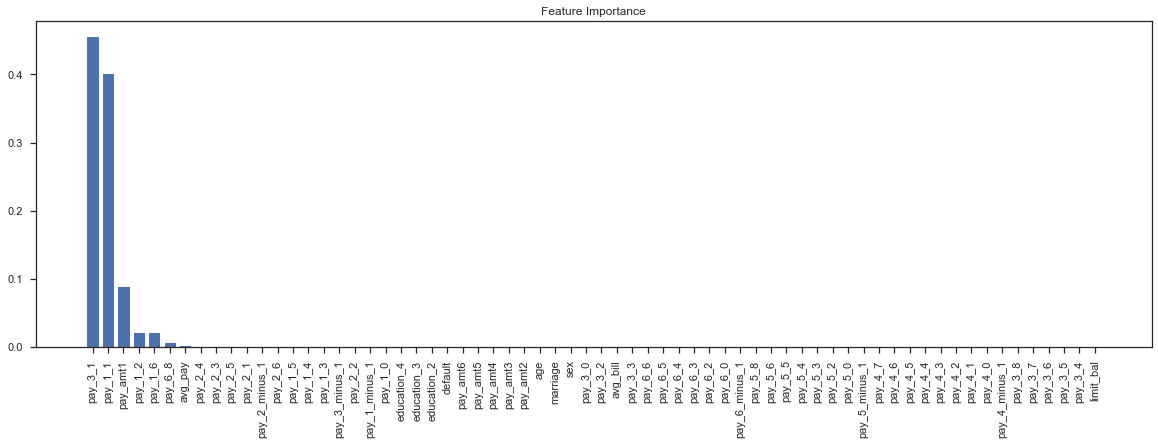

In [178]:
# Sort feature importances in descending order
indices_tree = np.argsort(imp_tree)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_tree = [df_train.columns[i] for i in indices_tree]

# Create plot
plt.figure(figsize=(20,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), imp_tree[indices_tree])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names_tree, rotation=90)

# Show plot
plt.show()

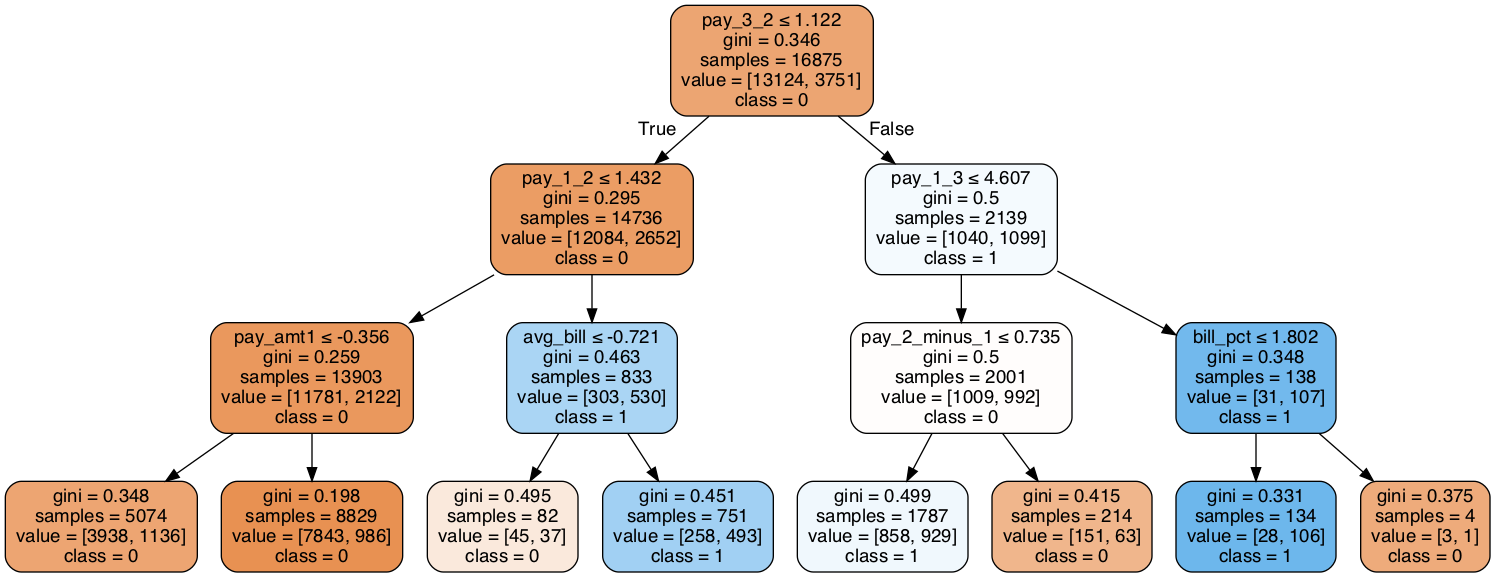

In [244]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = X.columns
dot_data = StringIO()
export_graphviz(CV_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('titanic.png')
Image(graph.create_png())

In [316]:
X_paycodes = df_train.loc[:,['pay_1_2', 'pay_1_3', 'pay_2_2', 
#                               'pay_1_0',
#        'pay_1_4', 'pay_1_5', 'pay_1_6',
#        , 'pay_2_2', 'pay_2_3', 'pay_2_4', 'pay_2_5',
#        'pay_2_6', 'pay_3_minus_1', 'pay_3_0', 'pay_3_1', , 'pay_3_3',
#        'pay_3_4', 'pay_3_5', 'pay_3_6', 'pay_3_7', 'pay_3_8', 'pay_4_minus_1',
#        'pay_4_0', 'pay_4_1', 'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5',
#        'pay_4_6', 'pay_4_7', 'pay_5_0', 'pay_5_2', 'pay_5_3',
#        'pay_5_4', 'pay_5_5', 'pay_5_6', 'pay_5_8', 'pay_6_minus_1', 'pay_6_0',
#        'pay_6_2', 'pay_6_3', 'pay_6_4', 'pay_6_5', 'pay_6_6', 
                                   ]]
y_paycodes = df_train.default


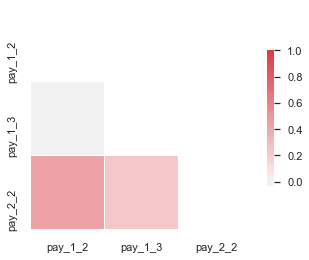

In [317]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_paycodes.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [318]:
X_train_paycodes, X_test_paycodes, y_train_paycodes, y_test_paycodes = train_test_split(
    X_paycodes, y_paycodes, random_state=1)

In [319]:
# df_train_paycodes = df_train.loc[:,['limit_bal', 'sex', 'marriage', 'age', 'pay_amt1', 'pay_amt2',
#        'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default',
#        'education_2', 'education_3', 'education_4', 'pay_1_minus_1', 'pay_1_0',
#        'pay_1_1', 'pay_1_2', 'pay_1_3', 'pay_1_4', 'pay_1_5', 'pay_1_6',
#        'pay_2_minus_1', 'pay_2_1', 'pay_2_2', 'pay_2_3', 'pay_2_4', 'pay_2_5',
#        'pay_2_6', 'pay_3_minus_1', 'pay_3_0', 'pay_3_1', 'pay_3_2', 'pay_3_3',
#        'pay_3_4', 'pay_3_5', 'pay_3_6', 'pay_3_7', 'pay_3_8', 'pay_4_minus_1',
#        'pay_4_0', 'pay_4_1', 'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5',
#        'pay_4_6', 'pay_4_7', 'pay_5_minus_1', 'pay_5_0', 'pay_5_2', 'pay_5_3',
#        'pay_5_4', 'pay_5_5', 'pay_5_6', 'pay_5_8', 'pay_6_minus_1', 'pay_6_0',
#        'pay_6_2', 'pay_6_3', 'pay_6_4', 'pay_6_5', 'pay_6_6', 'pay_6_8',
#        'avg_bill', 'avg_pay', 'bill_pct']]

In [324]:
tree_paycodes = DecisionTreeClassifier(random_state = 1)
tree_paycodes.fit(X_train_paycodes, y_train_paycodes)
y_pred_paycodes_forest = tree_paycodes.predict(X_test_paycodes)
print(accuracy_score(y_test_paycodes, y_pred_paycodes_forest))
print(f1_score(y_test_paycodes, y_pred_paycodes_forest))

0.8209777777777778
0.4294617563739377


### RANDOM FOREST

In [147]:
#create a dictionary of all the parameters you want to tune
params_forest = { 
    'max_depth': range(3,11),
    'max_features': range(12,19),
#     'min_samples_split': (.001,.01,.1,.2),
#     'min_samples_leaf': (.001,.01,.1),
#     'n_estimators': (100, 250, 500)
}

In [152]:
#create a grid search object and fit it to the data
forest = RandomForestClassifier(random_state = 1, n_estimators=100)
CV_forest = GridSearchCV(forest, params_forest, scoring='f1', n_jobs=-1, verbose=2)
CV_forest.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  2.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [153]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(CV_forest.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(CV_forest.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(CV_forest.best_estimator_)

0.4615495813279734
{'max_depth': 10, 'max_features': 15}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [154]:
#Predict the response for test dataset
y_pred_forest = CV_forest.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_forest))
print('Test Precision score: ', precision_score(y_test, y_pred_forest))
print('Test Recall score: ', recall_score(y_test, y_pred_forest))
print('Test F1 score: ', f1_score(y_test, y_pred_forest))

Test Accuracy score:  0.8208
Test Precision score:  0.6758064516129032
Test Recall score:  0.34176182707993474
Test F1 score:  0.4539544962080173


In [155]:
results['forest'] = f1_score(y_test, y_pred_forest)

In [181]:
imp_forest = CV_forest.best_estimator_.feature_importances_

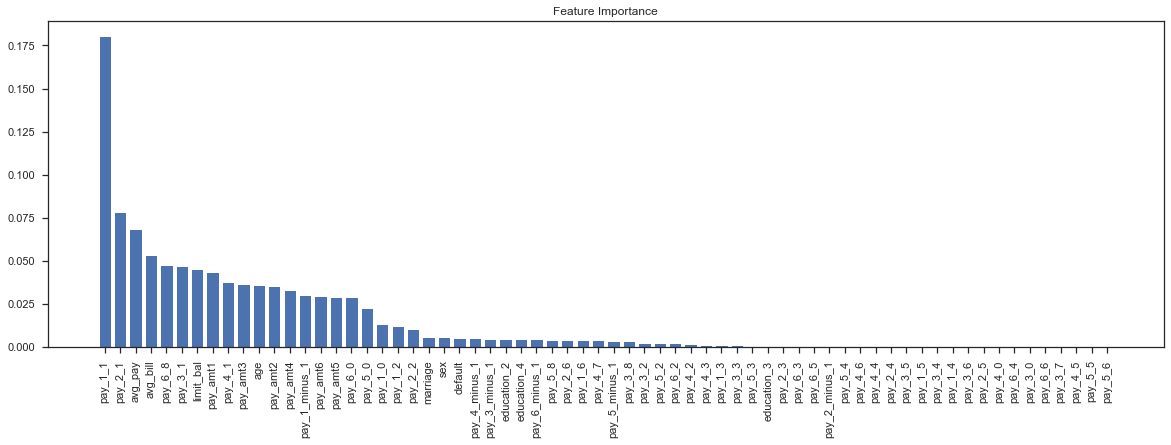

In [182]:
# Sort feature importances in descending order
indices_forest = np.argsort(imp_forest)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_forest = [df_train.columns[i] for i in indices_forest]

# Create plot
plt.figure(figsize=(20,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), imp_forest[indices_forest])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names_forest, rotation=90)

# Show plot
plt.show()

### ENSEMBLE - VOTING

In [156]:
from sklearn.ensemble import VotingClassifier

In [157]:


voting_clf = VotingClassifier(
                estimators=[('lr', CV_weighted.best_estimator_),
                            ('smote', CV_smote.best_estimator_),
                            ('lr_van', CV_van_weight.best_estimator_),
#                             ('tree', grid_tree_van.best_estimator_)
                           ], 
                voting='hard')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = f1_score(y_test, vc_preds)

print(vc_f1)

0.5290923196276183


In [325]:
results['ensemble_multiple'] = f1_score(y_test, vc_preds)

### ENSEMBLE WEIGHTED LR

In [ ]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .0005, .001, .01, .1, 1.0, 10.0],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}

In [198]:
C_param_range = [ 
#     .00001,
                 .00009, .000095, .0001, .00015, .00025,
#                  .01, .05, .1, .5, 1, 5
                ]
titles = [
#     'lr_0_00001',
          'lr_0_00009', 'lr_0_000095', 'lr_0_0001', 'lr_0_00015', 'lr_0_00025', 
#           'lr_0_01', 'lr_0_05', 'lr_0_1', 'lr_0_5', 'lr_1', 'lr_5'
         ]

params = dict(zip(titles, C_param_range)) 
models = {}

table = pd.DataFrame(columns = ['C_parameter','F1'])
table['C_parameter'] = C_param_range
j = 0

for k , v  in params.items():
    
    # Create model using different value for c  
    lr = LogisticRegression(penalty = 'l2', C = v, random_state = 1, class_weight='balanced', solver='sag')
    
    #save the model to a dictionary to use later in our voting classifiers
    models[k]= lr
    
    #the steps below this point are unnecessary in order to create a voting classifier, 
    #but it is easy to fit the model and see how performance changes for different levels of regularization
    lr.fit(X_train, y_train)
    
    # Predict using model
    y_preds = lr.predict(X_test)

    # Saving accuracy score in table
    table.iloc[j,1] = f1_score(y_test, y_preds)
    j += 1

In [199]:
table

,C_parameter,F1
0,0.000090,0.529113
1,0.000095,0.529481
2,0.000100,0.529481
3,0.000150,0.529435
4,0.000250,0.529549


In [200]:
lr_voting = VotingClassifier(estimators=list(models.items()), 
                              voting='hard')

lr_voting.fit(X_train, y_train)

lrv_preds = lr_voting.predict(X_test)

lrv_f1 = f1_score(y_test, lrv_preds)

print(lrv_f1)

0.5294806716126513


In [201]:
results['ensemble_lr'] = f1_score(y_test, lrv_preds)

### BAGGING - LR

In [164]:
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor

In [165]:
bc_lr = BaggingClassifier(
            base_estimator=LogisticRegression(random_state = 1, class_weight='balanced', C=0.001,
                                              solver='sag', penalty='l2'), 
            n_estimators= 100,
            max_samples= .7,
            max_features= 10,
            oob_score= True
                )

In [166]:
bc_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.001,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=1,
                                                    solver='sag', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=10,
                  max_samples=0.7, n_estimators=100, n_jobs=None

In [167]:
bc_lr.oob_score_

0.7691851851851852

In [168]:
bc_lr_preds = bc_lr.predict(X_test)

bc_lr_f1 = f1_score(y_test, bc_lr_preds)

print(bc_lr_f1)

0.5161048689138577


In [209]:
results['bag_lr'] = f1_score(y_test, bc_lr_preds)

In [326]:
results

{'knn_van': 0.31260096930533116,
 'weight_van': 0.5214152700186221,
 'tree_van': 0.5142378559463987,
 'forest_van': 0.44432373709940254,
 'baseline': 0.459620596205962,
 'smote': 0.5117728531855956,
 'weighted': 0.5295489891135303,
 'd_tree': 0.4741170778906628,
 'forest': 0.4539544962080173,
 'ensemble_multiple': 0.5290923196276183,
 'ensemble_lr': 0.5294806716126513,
 'bag_lr': 0.5161048689138577}

### BOOSTS!

In [215]:
import xgboost as xgb

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [364]:
default = pd.concat([X,y], axis=1)
default['default'].mean()

0.2212

In [365]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [366]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           scale_pos_weight= default['default'].mean(),
                           n_estimators = 10000)

In [367]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.2212, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [368]:
preds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.800711
F1: 0.374791


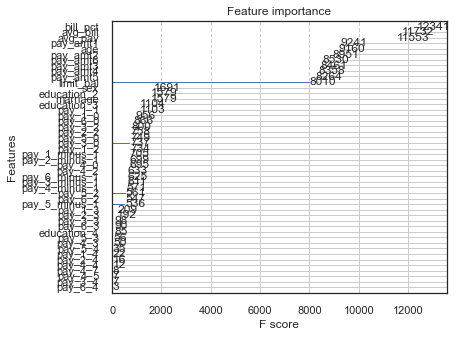

In [369]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [6, 5]
plt.show()

In [370]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg

In [371]:
default.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,...,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_8,avg_bill,avg_pay,bill_pct,default
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,6000.0,5000.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,146221.333333,4910.000000,0.731107,0.0
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6.0,6530.0,8103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6543.833333,3849.333333,0.327192,1.0
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,700.0,718.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39625.000000,16499.666667,0.792500,0.0
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,195.000000,130.000000,0.009750,0.0


In [372]:
train = pd.concat([X_train, y_train], axis=1)
target = 'default'

In [373]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)


Model Report
Accuracy : 0.8224
AUC Score (Train): 0.804723


In [374]:
preds = alg.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.821156
F1: 0.453855


In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score

In [ ]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [384]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100],
              'eta': [.1, .2, .3, .4],
              'subsample': [.7, .75, .8],
              'max_depth': range(2,6),
              'colsample_bytree': [0.7,0.8,0.9],
              'min_child_weight': [1, 2],
              'eval_metric': ['auc'],
              'random_state': [1]
             }

In [385]:
# initiate the Gridsearch model
CV_xgb = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [386]:
CV_xgb.fit(train[predictors],train[target])

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 24.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ne, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'eta': [0.1, 0.2, 0.3, 0.4], 'eval_metric': ['auc'],
                         'max_depth': range(2, 6), 'min_child_

In [394]:
print('Best parameters: ', CV_xgb.best_params_)
print('---------------------------------------------------')
print('Best score: ', CV_xgb.best_score_)

Best parameters:  {'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'auc', 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'random_state': 1, 'subsample': 0.75}
---------------------------------------------------
Best score:  0.4638654284598068


In [392]:
y_xgb_preds = CV_xgb.best_estimator_.predict(X_test)


print('Accuracy: ', accuracy_score(y_test, y_xgb_preds))
print('F1 Score: ', f1_score(y_test, y_xgb_preds))
print('AUC: ', roc_auc_score(y_test, y_xgb_preds))

Accuracy:  0.8216888888888889
F1 Score:  0.4639230358097275
AUC:  0.6530156453324147


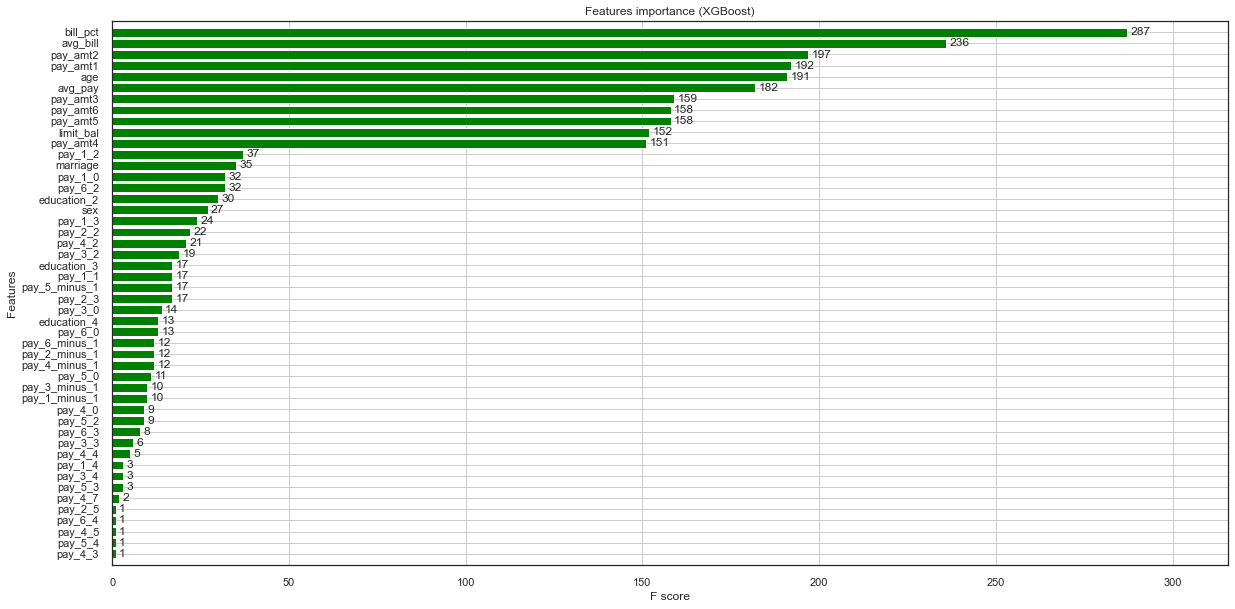

In [397]:
fig, (ax) = plt.subplots(ncols=1, figsize=(20,10))
xgb.plot_importance(CV_xgb.best_estimator_, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [336]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 3, 
          'alpha': 1}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=500,
                    early_stopping_rounds=5,
                    metrics="logloss", 
                    as_pandas=True, 
                    seed=123)

In [337]:
cv_results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.657032,0.000268,0.657228,0.000526
1,0.627097,0.001018,0.627458,0.002012
2,0.599473,0.001892,0.600290,0.003309
3,0.576132,0.001998,0.577026,0.003346
4,0.557126,0.002866,0.558415,0.003795
...,...,...,...,...
109,0.415232,0.001510,0.432975,0.005180
110,0.415038,0.001520,0.433007,0.005151
111,0.414861,0.001512,0.432915,0.005165
112,0.414711,0.001496,0.432924,0.005161


In [330]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100],
              'learning_rate': [0.05, 0.075],
              'max_depth': range(3,6),
              'grow_policy': ['lossguide'],
              'max_leaves': range(3,7),
#               'colsample_bytree': [0.5,0.45,0.4],
              'min_child_weight': range(2,5)
             }

In [331]:
# initiate the Gridsearch model
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [332]:
gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  7.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'grow_policy': ['lossguide'],
                         'learning_rate': [0.05, 0.075],
                         'max_depth': range(3, 6), 'max_leaves': range(3, 

In [333]:
print('Params: ', gsearch1.best_params_)

print('------------------------------')

print('Score: ', gsearch1.best_score_)

Params:  {'grow_policy': 'lossguide', 'learning_rate': 0.075, 'max_depth': 5, 'max_leaves': 3, 'min_child_weight': 4, 'n_estimators': 100}
------------------------------
Score:  0.46290866863341595


In [334]:
xg_preds = gsearch1.best_estimator_.predict(X_test)


test_f1 = f1_score(y_test, xg_preds)
test_acc = accuracy_score(y_test, xg_preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.820622
F1: 0.455478


In [335]:
print(roc_auc_score(y_test, xg_preds))

0.6488036543972066


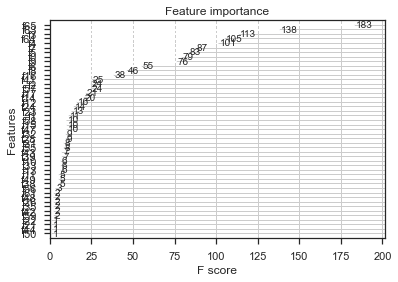

In [226]:
from xgboost import plot_importance

plot_importance(gsearch1.best_estimator_)

In [227]:
gsearch1.best_estimator_.get_booster().get_fscore()

{'f16': 38,
 'f23': 13,
 'f64': 105,
 'f24': 14,
 'f41': 25,
 'f17': 21,
 'f57': 24,
 'f6': 55,
 'f47': 10,
 'f28': 9,
 'f4': 101,
 'f3': 113,
 'f7': 87,
 'f55': 8,
 'f63': 138,
 'f2': 24,
 'f9': 76,
 'f31': 8,
 'f15': 10,
 'f32': 9,
 'f0': 79,
 'f39': 7,
 'f65': 183,
 'f56': 3,
 'f8': 46,
 'f5': 83,
 'f14': 20,
 'f38': 5,
 'f49': 5,
 'f13': 6,
 'f33': 6,
 'f11': 5,
 'f10': 6,
 'f58': 10,
 'f12': 16,
 'f1': 11,
 'f43': 7,
 'f59': 2,
 'f42': 2,
 'f50': 1,
 'f35': 2,
 'f26': 2,
 'f48': 2,
 'f61': 2,
 'f44': 1,
 'f21': 1,
 'f22': 1}

In [170]:
fpr_knn_van, tpr_knn_van, threshold_knn_van = roc_curve(y_test_van, y_pred_knn_van)
fpr_weight_van, tpr_weight_van, threshold_weight_van = roc_curve(y_test_van, y_pred_van_weight)
fpr_tree_van, tpr_tree_van, threshold_tree_van = roc_curve(y_test_van, y_pred_tree_van)
fpr_forest_van, tpr_forest_van, threshold_forest_van = roc_curve(y_test_van, y_pred_forest_van)

fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_smote)
fpr_weighted, tpr_weighted, thresholds_weighted = roc_curve(y_test, y_pred_weighted)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_pred_forest)
fpr_vote, tpr_vote, thresholds_vote = roc_curve(y_test, vc_preds)
fpr_ens_weight, tpr_ens_weight, thresholds_ens_weight = roc_curve(y_test, lrv_preds)
fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test, bc_lr_preds)


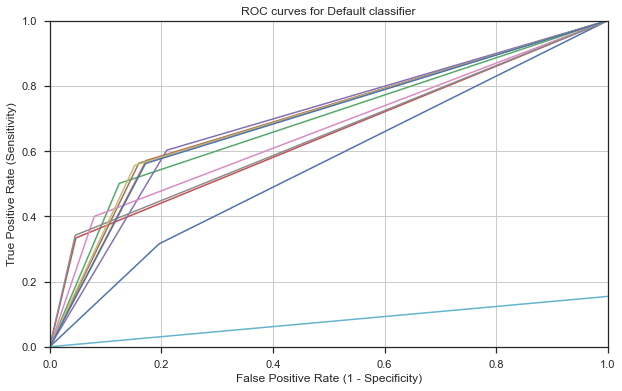

In [184]:
plt.figure(figsize=(10,6))

plt.plot(fpr_knn_van, tpr_knn_van)
plt.plot(fpr_weight_van, tpr_weight_van)
plt.plot(fpr_tree_van, tpr_tree_van)
plt.plot(fpr_forest_van, tpr_forest_van)
plt.plot(fpr_smote, tpr_smote)
plt.plot(fpr_weighted, tpr_weighted)
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr_vote, tpr_vote)
plt.plot(fpr_ens_weight)
plt.plot(fpr_bag, tpr_bag)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curves for Default classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

In [172]:
print(roc_auc_score(y_test_van, y_pred_knn_van))
print(roc_auc_score(y_test_van, y_pred_van_weight))
print(roc_auc_score(y_test_van, y_pred_tree_van))
print(roc_auc_score(y_test_van, y_pred_forest_van))
print(roc_auc_score(y_test, y_pred_smote))
print(roc_auc_score(y_test, y_pred_weighted))
print(roc_auc_score(y_test, y_pred_tree))
print(roc_auc_score(y_test, y_pred_forest))
print(roc_auc_score(y_test, vc_preds))
print(roc_auc_score(y_test, lrv_preds))
print(roc_auc_score(y_test, bc_lr_preds))

0.5597398674695087
0.6992116330754394
0.6881209469599906
0.6433881977477456
0.6964764162995669
0.7016120748190212
0.6599414370832463
0.6480348121532886
0.7019866223489173
0.7013714929279122
0.6951801480909016


In [ ]:
fuuuuuuuck 

In [ ]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')

lr_clf_weighted.fit(X_train, y_train)

y_pred_weighted = lr_clf_weighted.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_weighted))
print('Test Precision score: ', metrics.precision_score(y_test, y_pred_weighted))
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_weighted))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_weighted))

In [ ]:
lr_coef_df = pd.DataFrame(data=CV_weighted.best_estimator_.coef_)
lr_coef_df.columns = X_poly_simplified.columns
lr_coef_df = lr_coef_df.T.sort_values(by=0).T

sorted_df = lr_coef_df.T
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].tail(20)

In [ ]:
poly_drop = list(sorted_df[sorted_df[0].abs() < .025].index)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_weighted))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_weighted)
classes = ['No Default', 'Defaulted']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
lr_clf_coef_df = pd.DataFrame(data=lr_clf_weighted.coef_)
lr_clf_coef_df.columns = X_poly.columns
lr_clf_coef_df = lr_clf_coef_df.T.sort_values(by=0).T
lr_clf_coef_df.T

In [ ]:
list(sorted_df2[sorted_df2[0].abs() < .01].index)

In [ ]:
sorted_df2 = lr_clf_coef_df.T
sorted_df2.iloc[sorted_df2[0].abs().argsort()][::-1].tail(20)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# neighbors = list(range(1,16,2))
# algos = ['ball_tree', 'kd_tree', 'brute']
# p = list(range(1,6))
# weight = ['uniform', 'distance']
# params = {'n_neighbors': neighbors, 'algorithm': algos, 'p': p, 'weights': weight}
# grid_k = GridSearchCV(KNeighborsClassifier(), params, scoring='f1', verbose=1, n_jobs=-1, cv=7)
# grid_k.fit(X_train, y_train)

In [ ]:
# # examine the best model
# print(grid_k.best_score_)
# print(grid_k.best_params_)
# print(grid_k.best_estimator_)

In [ ]:
print(metrics.confusion_matrix(y_test, rfc_pred))

In [ ]:
results = {}

results['imbalanced'] = (accuracy_score(y_test, y_pred_test), f1_score(y_test, y_pred_test))

In [ ]:
df_train.hist('limit_bal')

In [ ]:
#create a list of parameters to check 
parameter_dict={'min_samples_leaf':[.01,.05,.1], 'max_depth':range(1,11), 'min_impurity_decrease':[.01,.05,.1]}

#create our estimaor
reg_tree=DecisionTreeRegressor(random_state=1)

In [ ]:
#create the instance of GridSearchCV
grid_tree=GridSearchCV(reg_tree, parameter_dict, cv=5, verbose=1, scoring='neg_mean_squared_error')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

In [ ]:
from sklearn.metrics import mean_squared_error

#Predict the response for test dataset
y_pred_tree = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Testing Metric:", metrics.mean_squared_error(y_test, y_pred_tree))

In [ ]:
df_train.boxplot('sum_paycodes', 'default', showfliers=False)

In [ ]:
df_train.boxplot('pay_1', 'default', showfliers=False)

In [ ]:
conditions = [df_train.pay_1 <= 0, df_train.pay_1 > 0]
choices = [0, 1]

print(df_train.pay_1.value_counts())
df_train['pay1_simplified'] = np.select(conditions, choices, df_train.pay_1)
print(df_train.pay1_simplified.value_counts())

In [ ]:
df_train.groupby('default').pay1_simplified.value_counts(normalize=True)

In [ ]:
conditions = [df_train.pay_2 <= 0, df_train.pay_2 > 0]
choices = [0, 1]

print(df_train.pay_2.value_counts())
df_train['pay2_simplified'] = np.select(conditions, choices, df_train.pay_2)
print(df_train.pay2_simplified.value_counts())

In [ ]:
df_train.groupby('default').pay2_simplified.value_counts(normalize=True)

In [ ]:
df_train.head()

In [ ]:
df_train.groupby('default').sum_paycodes.describe()

In [ ]:
df_train.boxplot('age', 'default', showfliers=False)

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].sum_paycodes.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].sum_paycodes.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

In [ ]:
df_train.hist('bill_amt1')

* drop pay_amt6
* drop bill_amt2, drop bill_amt4, drop bill_amt6

In [ ]:
df_train['']

In [ ]:
df_train.iloc[:,5:].head(20)

In [ ]:
df_train.iloc[:,5:].corr()

In [ ]:
df_train.plot.scatter('PAY_0', 'default payment next month')

In [ ]:
cols =[]
for i in df_train:
    cols.append(i)

In [ ]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df_train, y_vars=['default payment next month'],x_vars=i, kind='reg', height=3)

In [ ]:
df_train.hist('AGE')

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('Payment Code 1')
plt.title('Age vs Payment Code 1')
plt.legend()

plt.show()

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].limit_bal.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].limit_bal.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('CC Limit')
plt.ylabel('Payment Code 1')
plt.title('CC Limit vs Payment Code 1')
plt.legend()

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
features_poly = polynomial_features_2.fit_transform(df_train)
poly_columns = polynomial_features_2.get_feature_names(df_train.columns)

features_poly = pd.DataFrame(features_poly, columns=poly_columns)
features_poly.head()

In [ ]:
features_poly.columns

In [ ]:
# trying logistic regression again with the balanced dataset
y_train_up = upsampled.default
X_train_up = upsampled.drop('default', axis=1)

upsampled_dt = DecisionTreeClassifier(max_depth=5)

upsampled_dt.fit(X_train, y_train)

upsampled_pred = upsampled_dt.predict(X_test)

# checking f1
print('Test F1 score: ', f1_score(y_test, upsampled_pred))